#LOAN DEFAULT PREDICTION-R PROGRAMMING


##Importing Libraries

In [60]:
# install.packages("readr")
# install.packages("caret")
# install.packages("rpart.plot")
# install.packages("class")
# install.packages("ROSE")
# install.packages("smotefamily")
# install.packages("pROC")

library(e1071)
library(pROC)
library(readr)
library(caret)
library(rpart)        # For decision trees
library(rpart.plot)
library(class)
library(ROSE)
library(smotefamily)
library(ggplot2)
# library(yardstick)
library(dplyr)

## loading dataset

In [61]:
df <- read.csv("https://raw.githubusercontent.com/SaahilShaikh17/LoanDefaultPrediction/main/Loan_default.csv")

# data exploration

In [62]:
head(df)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
2,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
3,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
4,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
5,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
6,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1


The above shows us the top 6 values of each feature in our dataframe df.further We will analyse which features are categorcal and which are numerical in nature


In [63]:
# shape of dataset
num_rows <- nrow(df)
num_cols <- ncol(df)

cat( num_rows, ",", num_cols)

255347 , 18

In [64]:
colnames(df)

[1] "LoanID"         "Age"            "Income"         "LoanAmount"    
 [5] "CreditScore"    "MonthsEmployed" "NumCreditLines" "InterestRate"  
 [9] "LoanTerm"       "DTIRatio"       "Education"      "EmploymentType"
[13] "MaritalStatus"  "HasMortgage"    "HasDependents"  "LoanPurpose"   
[17] "HasCoSigner"    "Default"

A brief description of all the features present

In [65]:
str(df)

'data.frame':	255347 obs. of  18 variables:
 $ LoanID        : chr  "I38PQUQS96" "HPSK72WA7R" "C1OZ6DPJ8Y" "V2KKSFM3UN" ...
 $ Age           : int  56 69 46 32 60 25 38 56 36 40 ...
 $ Income        : int  85994 50432 84208 31713 20437 90298 111188 126802 42053 132784 ...
 $ LoanAmount    : int  50587 124440 129188 44799 9139 90448 177025 155511 92357 228510 ...
 $ CreditScore   : int  520 458 451 743 633 720 429 531 827 480 ...
 $ MonthsEmployed: int  80 15 26 0 8 18 80 67 83 114 ...
 $ NumCreditLines: int  4 1 3 3 4 2 1 4 1 4 ...
 $ InterestRate  : num  15.23 4.81 21.17 7.07 6.51 ...
 $ LoanTerm      : int  36 60 24 24 48 24 12 60 48 48 ...
 $ DTIRatio      : num  0.44 0.68 0.31 0.23 0.73 0.1 0.16 0.43 0.2 0.33 ...
 $ Education     : chr  "Bachelor's" "Master's" "Master's" "High School" ...
 $ EmploymentType: chr  "Full-time" "Full-time" "Unemployed" "Full-time" ...
 $ MaritalStatus : chr  "Divorced" "Married" "Divorced" "Married" ...
 $ HasMortgage   : chr  "Yes" "No" "Yes" "No" ...

Feature statistics

In [66]:
summary(df)

    LoanID               Age           Income         LoanAmount    
 Length:255347      Min.   :18.0   Min.   : 15000   Min.   :  5000  
 Class :character   1st Qu.:31.0   1st Qu.: 48826   1st Qu.: 66156  
 Mode  :character   Median :43.0   Median : 82466   Median :127556  
                    Mean   :43.5   Mean   : 82499   Mean   :127579  
                    3rd Qu.:56.0   3rd Qu.:116219   3rd Qu.:188985  
                    Max.   :69.0   Max.   :149999   Max.   :249999  
  CreditScore    MonthsEmployed   NumCreditLines   InterestRate  
 Min.   :300.0   Min.   :  0.00   Min.   :1.000   Min.   : 2.00  
 1st Qu.:437.0   1st Qu.: 30.00   1st Qu.:2.000   1st Qu.: 7.77  
 Median :574.0   Median : 60.00   Median :2.000   Median :13.46  
 Mean   :574.3   Mean   : 59.54   Mean   :2.501   Mean   :13.49  
 3rd Qu.:712.0   3rd Qu.: 90.00   3rd Qu.:3.000   3rd Qu.:19.25  
 Max.   :849.0   Max.   :119.00   Max.   :4.000   Max.   :25.00  
    LoanTerm        DTIRatio       Education         Em

Displaying the null values

In [67]:
# checking for null values
for (cols in colnames(df)){
  null_count <- sum(is.na(df[[cols]]))
  cat( cols, "null vals: ", null_count, "\n")
}

LoanID null vals:  0 
Age null vals:  0 
Income null vals:  0 
LoanAmount null vals:  0 
CreditScore null vals:  0 
MonthsEmployed null vals:  0 
NumCreditLines null vals:  0 
InterestRate null vals:  0 
LoanTerm null vals:  0 
DTIRatio null vals:  0 
Education null vals:  0 
EmploymentType null vals:  0 
MaritalStatus null vals:  0 
HasMortgage null vals:  0 
HasDependents null vals:  0 
LoanPurpose null vals:  0 
HasCoSigner null vals:  0 
Default null vals:  0 


The above results show that there is no null values in the dataset

In [68]:
# categorical cols including numerical
categorical_cols <- names(df)[sapply(df, is.character)]
categorical_cols <- setdiff(categorical_cols, "LoanID")
categorical_cols

[1] "Education"      "EmploymentType" "MaritalStatus"  "HasMortgage"   
[5] "HasDependents"  "LoanPurpose"    "HasCoSigner"

In [69]:
# checking for unique values in categorical columns
for (col in categorical_cols) {
  value_counts <- table(df[[col]])
  cat("\nColumn:", col, "\n")
  print(value_counts)
}


Column: Education 

 Bachelor's High School    Master's         PhD 
      64366       63903       63541       63537 

Column: EmploymentType 

    Full-time     Part-time Self-employed    Unemployed 
        63656         64161         63706         63824 

Column: MaritalStatus 

Divorced  Married   Single 
   85033    85302    85012 

Column: HasMortgage 

    No    Yes 
127670 127677 

Column: HasDependents 

    No    Yes 
127605 127742 

Column: LoanPurpose 

     Auto  Business Education      Home     Other 
    50844     51298     51005     51286     50914 

Column: HasCoSigner 

    No    Yes 
127646 127701 


In [70]:
value_counts <- table(df[["Default"]])
cat("\nColumn: Default\n")
print(value_counts)


Column: Default

     0      1 
225694  29653 


removing column LoanID

In [71]:
df <- subset(df, select = -LoanID)

converting binary cat columns to 1/0

In [72]:
binary_cat_cols = c('HasCoSigner', 'HasDependents', 'HasMortgage')
for (col in binary_cat_cols){
  df[[col]] <- ifelse(df[[col]] == "Yes", 1, 0)
}

One hot encoding

In [73]:
# one hot encode cols havinf 4 categories:
one_hot_cols <- c('Education', 'EmploymentType', 'MaritalStatus','LoanPurpose')
formula <- as.formula(paste("~", paste(one_hot_cols, collapse = " + ")))
new_df <- dummyVars(formula, data = df)
new_df <- data.frame(predict(new_df, newdata = df))
new_df <- cbind(new_df, df)
new_df <- new_df[, !(names(new_df) %in% one_hot_cols)]
str(new_df)

oversampled_df <- data.frame(new_df)


'data.frame':	255347 obs. of  29 variables:
 $ EducationBachelor.s        : num  1 0 0 0 1 0 1 0 1 0 ...
 $ EducationHigh.School       : num  0 0 0 1 0 1 0 0 0 1 ...
 $ EducationMaster.s          : num  0 1 1 0 0 0 0 0 0 0 ...
 $ EducationPhD               : num  0 0 0 0 0 0 0 1 0 0 ...
 $ EmploymentTypeFull.time    : num  1 1 0 1 0 0 0 1 0 0 ...
 $ EmploymentTypePart.time    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ EmploymentTypeSelf.employed: num  0 0 0 0 0 0 0 0 1 1 ...
 $ EmploymentTypeUnemployed   : num  0 0 1 0 1 1 1 0 0 0 ...
 $ MaritalStatusDivorced      : num  1 0 1 0 1 0 0 0 1 0 ...
 $ MaritalStatusMarried       : num  0 1 0 1 0 0 0 1 0 1 ...
 $ MaritalStatusSingle        : num  0 0 0 0 0 1 1 0 0 0 ...
 $ LoanPurposeAuto            : num  0 0 1 0 1 0 0 0 0 0 ...
 $ LoanPurposeBusiness        : num  0 0 0 1 0 1 0 0 0 0 ...
 $ LoanPurposeEducation       : num  0 0 0 0 0 0 0 0 1 0 ...
 $ LoanPurposeHome            : num  0 0 0 0 0 0 1 1 0 0 ...
 $ LoanPurposeOther           : num  1 1 

The dataset is biased hence we'll add more samples

In [74]:
oversampled_df=ovun.sample(Default~.,data=new_df,method="over")
oversampled_df=oversampled_df$data
table(oversampled_df$Default)


     0      1 
225694 225852 

In [75]:
str(oversampled_df)

'data.frame':	451546 obs. of  29 variables:
 $ EducationBachelor.s        : num  1 0 0 1 1 0 0 0 0 0 ...
 $ EducationHigh.School       : num  0 0 1 0 0 0 1 1 0 1 ...
 $ EducationMaster.s          : num  0 1 0 0 0 0 0 0 1 0 ...
 $ EducationPhD               : num  0 0 0 0 0 1 0 0 0 0 ...
 $ EmploymentTypeFull.time    : num  1 1 1 0 0 1 0 0 1 0 ...
 $ EmploymentTypePart.time    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ EmploymentTypeSelf.employed: num  0 0 0 0 0 0 1 0 0 0 ...
 $ EmploymentTypeUnemployed   : num  0 0 0 1 1 0 0 1 0 1 ...
 $ MaritalStatusDivorced      : num  1 0 0 1 0 0 0 0 1 0 ...
 $ MaritalStatusMarried       : num  0 1 1 0 0 1 1 1 0 0 ...
 $ MaritalStatusSingle        : num  0 0 0 0 1 0 0 0 0 1 ...
 $ LoanPurposeAuto            : num  0 0 0 1 0 0 0 0 1 1 ...
 $ LoanPurposeBusiness        : num  0 0 1 0 0 0 0 0 0 0 ...
 $ LoanPurposeEducation       : num  0 0 0 0 0 0 0 1 0 0 ...
 $ LoanPurposeHome            : num  0 0 0 0 1 1 0 0 0 0 ...
 $ LoanPurposeOther           : num  1 1 

# immediate ready
all code in few lines

In [76]:
# load
df <- read.csv("https://raw.githubusercontent.com/SaahilShaikh17/LoanDefaultPrediction/main/Loan_default.csv")
# remove loanid
df <- subset(df, select = -LoanID)
# binary convert
binary_cat_cols = c('HasCoSigner', 'HasDependents', 'HasMortgage')
for (col in binary_cat_cols){
  df[[col]] <- ifelse(df[[col]] == "Yes", 1, 0)
}

# removing cat cols
cols <- c('InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines', 'Default',
          'HasCoSigner', 'HasDependents', 'HasMortgage')
df <- df[, cols]

# oversample
oversampled_df=ovun.sample(Default~.,data=df,method="over")
oversampled_df=oversampled_df$data
table(oversampled_df$Default)


     0      1 
225694 225484 

# training models

In [77]:
oversampled_df$Default = factor(oversampled_df$Default,
                           levels = c(0, 1))

# X <- oversampled_df[, -ncol(oversampled_df)]  # Features
# y <- oversampled_df$Default       # Target variable'

In [78]:
set.seed(123)  # Set a seed for reproducibility
train_indices <- createDataPartition(oversampled_df$Default, p = 0.8, list = FALSE)

train_data <- oversampled_df[train_indices,]
test_data <- oversampled_df[-train_indices, ]

test_data$Default = factor(test_data$Default,
                           levels = c(0, 1))

In [79]:
str(train_data)
str(test_data)

'data.frame':	360944 obs. of  13 variables:
 $ InterestRate  : num  15.23 7.07 6.51 9.09 9.08 ...
 $ Income        : int  85994 31713 20437 132784 140466 23265 117550 139699 74064 119704 ...
 $ LoanAmount    : int  50587 44799 9139 228510 163781 63527 95744 88143 230883 25697 ...
 $ Age           : int  56 32 60 40 28 41 53 57 41 20 ...
 $ CreditScore   : int  520 743 633 480 652 829 395 635 432 313 ...
 $ MonthsEmployed: int  80 0 8 114 94 87 112 112 31 49 ...
 $ DTIRatio      : num  0.44 0.23 0.73 0.33 0.23 0.45 0.73 0.2 0.89 0.28 ...
 $ LoanTerm      : int  36 24 48 48 48 60 24 48 60 24 ...
 $ NumCreditLines: int  4 3 4 4 2 4 4 4 2 1 ...
 $ Default       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HasCoSigner   : num  1 0 0 1 0 1 1 0 0 0 ...
 $ HasDependents : num  1 0 1 0 0 0 0 0 0 0 ...
 $ HasMortgage   : num  1 0 0 1 0 1 0 0 1 1 ...
'data.frame':	90234 obs. of  13 variables:
 $ InterestRate  : num  4.81 19.11 8.15 13.56 16.96 ...
 $ Income        : int  50432 111188 

In [80]:
numerical_columns <- c('Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio')

# scaler <- preProcess(train_data[, numerical_columns], method = c('center', 'scale'))
# scaler1 <- preProcess(X_test[, numerical_columns], method = c('center', 'scale'))
# # Standardize numerical columns for the training set
# train_data[, numerical_columns] <- predict(scaler, X_train[, numerical_columns])

# # Standardize numerical columns for the testing set
# X_test[, numerical_columns] <- predict(scaler1, X_test[, numerical_columns])


# Feature Scaling
train_data[numerical_columns] = scale(train_data[numerical_columns])
test_data[numerical_columns] = scale(test_data[numerical_columns])



In [81]:
head(train_data)
head(test_data)

,InterestRate,Income,LoanAmount,Age,CreditScore,MonthsEmployed,DTIRatio,LoanTerm,NumCreditLines,Default,HasCoSigner,HasDependents,HasMortgage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,0.1037136,0.2029773,-1.1894021,1.03708764,-0.3017118,0.7083929,-0.2881216,36,4,0,1,1,1
3,-1.1301297,-1.1510926,-1.2710858,-0.56963156,1.1019020,-1.6026429,-1.2000145,24,3,0,0,0,0
4,-1.2148052,-1.4323787,-1.7743408,1.30487417,0.4095365,-1.3715394,0.9711592,48,4,0,0,1,0
7,-0.8246930,1.3701799,1.3215527,-0.03405850,-0.5534811,1.6905832,-0.7657798,48,4,0,1,0,1
8,-0.8262050,1.5618117,0.4080587,-0.83741810,0.5291269,1.1128242,-1.2000145,48,2,0,0,0,0
9,-0.7279210,-1.3618326,-1.0067851,0.03288814,1.6432060,0.9106086,-0.2446981,60,4,0,1,0,1


,InterestRate,Income,LoanAmount,Age,CreditScore,MonthsEmployed,DTIRatio,LoanTerm,NumCreditLines,Default,HasCoSigner,HasDependents,HasMortgage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
2,-1.4786438,-0.6850640,-0.1534857,1.91560503,-0.7014255,-1.1722197,0.7642946,60,1,0,1,0,0
5,0.6905112,0.8276486,0.5898794,-0.16397288,-0.8843614,0.7047021,-1.4964527,12,1,0,1,0,1
6,-0.9720020,1.2164085,0.2857479,1.04352398,-0.2409318,0.3293177,-0.3226032,60,4,0,1,0,0
14,-0.1513636,-1.1187153,-1.7586935,-0.09688972,1.5253454,1.4554708,0.6773428,60,2,0,0,0,1
15,0.3643795,1.1321780,0.3654068,0.03727660,-1.2186924,0.2715663,-0.4965068,60,4,0,1,0,1
25,0.2354437,0.6061546,-1.1303566,1.24477345,1.7082812,-1.4321011,-0.2791273,60,1,0,0,0,1


# Desicion tree model

the formula for the model, which consists of the dependent variable (target) and the independent variables (features).

In [82]:
# train the model
c = rpart.control(minsplit = 4, maxdepth = 10, minbucket=4, criterion = "gini", splitter='best', cp=0)
dt_model = rpart(formula = Default ~ ., data = train_data, control=c)

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


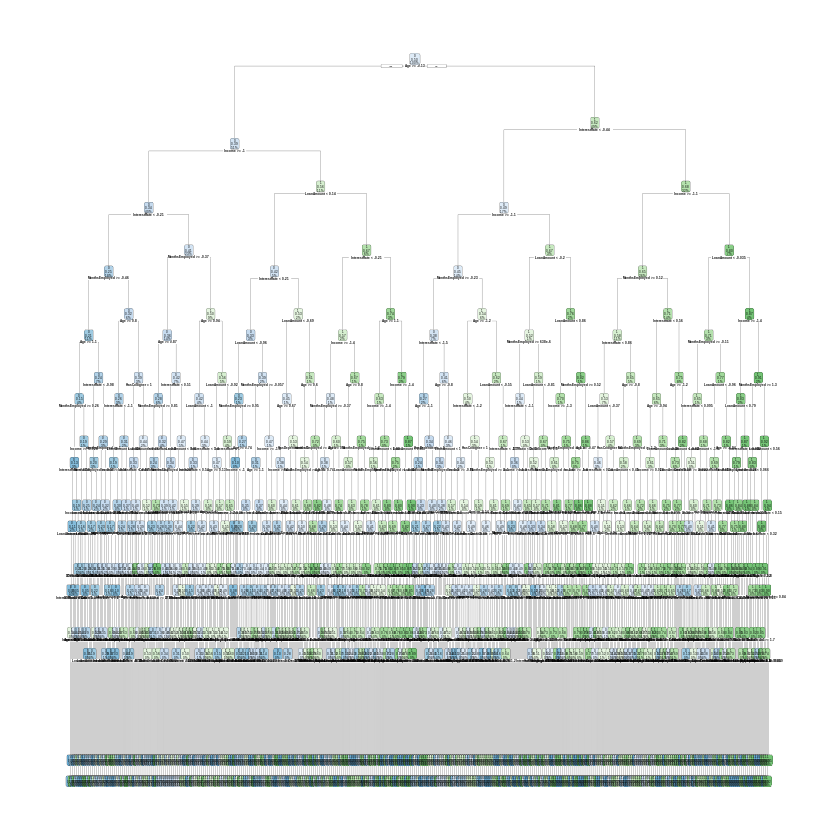

In [83]:
# visualise the decision tree
rpart.plot(dt_model)

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


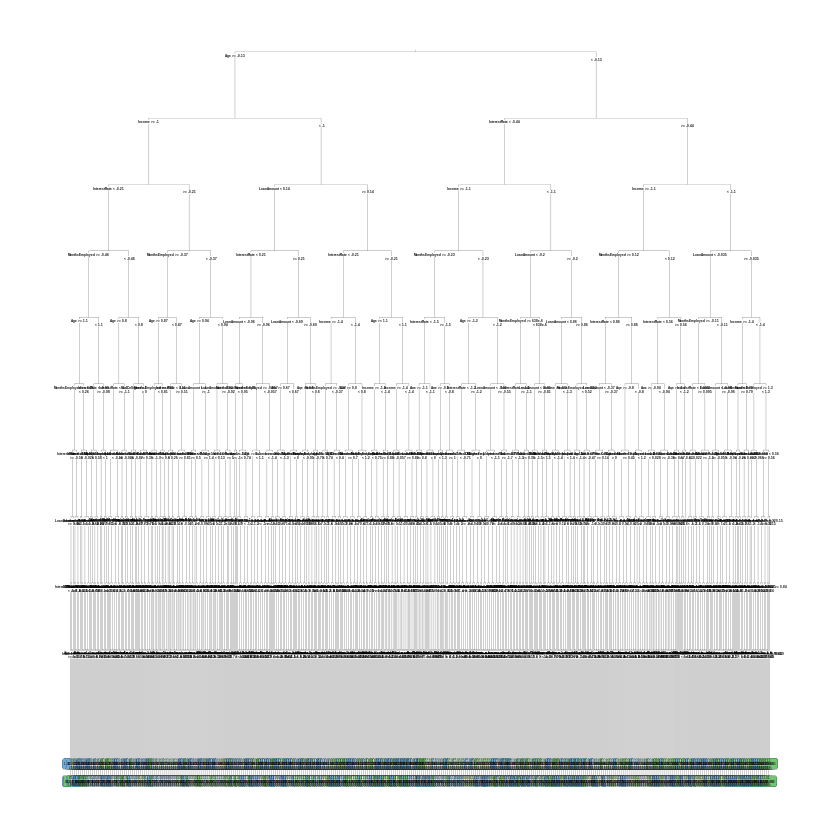

In [84]:
rpart.plot(dt_model, box.palette = "auto", type = 3, extra = 104)

In [85]:
# make predictions
# Predicting the Test set results
predictions = predict(dt_model,
                 newdata = test_data,
                 type = 'class')

In [86]:
calc_results <- function(predictions) {
  # Calculate accuracy
  accuracy <- sum(predictions == test_data$Default) / nrow(test_data)
  cat("accuracy:", accuracy, "\n")

  # Calculate the confusion matrix
  confusion_matrix <- table(Actual = test_data$Default, Predicted = predictions)
  cat("\nConfusion matrix:\n\n")
  print(confusion_matrix)


  TP <- confusion_matrix[2, 2]  # True Positives
  FP <- confusion_matrix[1, 2]  # False Positives
  FN <- confusion_matrix[2, 1]  # False Negatives

  # Calculate precision, recall, and F1 score
  precision <- TP / (TP + FP)
  recall <- TP / (TP + FN)
  f1_score <- 2 * (precision * recall) / (precision + recall)

  cat("\nPrecision:", precision, "\n")
  cat("Recall:", recall, "\n")
  cat("F1 Score:", f1_score, "\n")
}



In [87]:
calc_results(predictions)

accuracy: 0.6862491 

Confusion matrix:

      Predicted
Actual     0     1
     0 30829 14309
     1 14002 31094

Precision: 0.6848446 
Recall: 0.6895068 
F1 Score: 0.6871678 


In [88]:
# Assuming you have true class labels and predicted probabilities
plot_ruc <- function(predictions) {
  true_values <- test_data$Default
  true_values <- as.numeric(true_values)
  predictions <- as.numeric(predictions)

  roc_curve <- roc(response = true_values, predictor = predictions)

  # Plot the ROC curve
  plot(roc_curve, print.auc = TRUE, print.auc.y = 0.3)

  # Add labels and a legend
  legend("bottomright", legend = paste("AUC =", round(auc(roc_curve), 2)), bty = "n")
  title("ROC Curve")
}


Setting levels: control = 1, case = 2

Setting direction: controls < cases



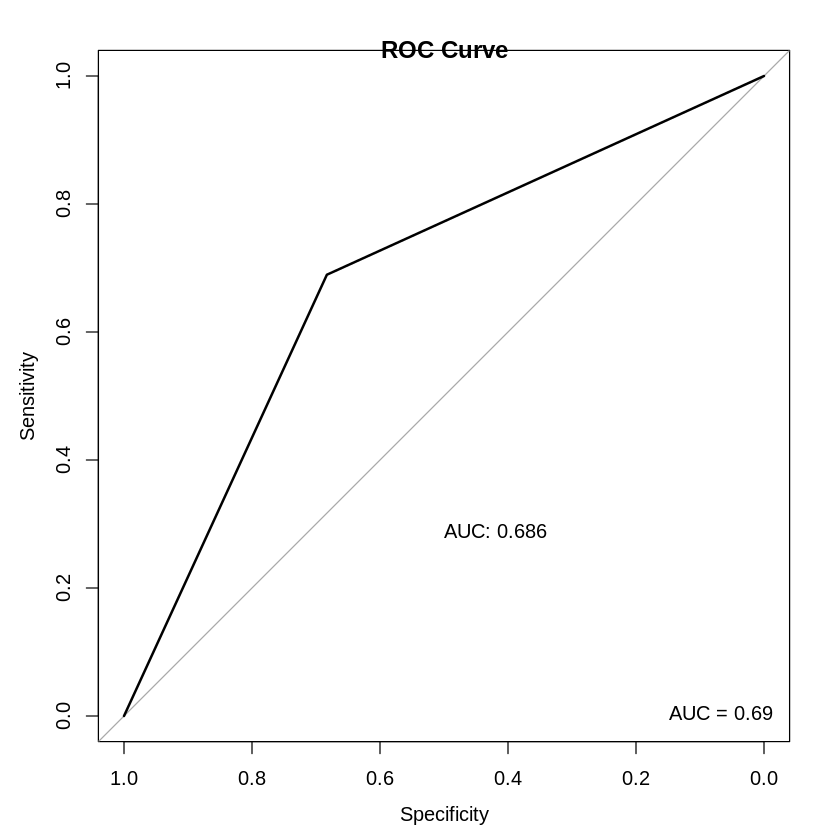

In [89]:
plot_ruc(predictions)

In [90]:
accuracy_tune <- function(fit) {
    predict_unseen <- predict(fit, test_data, type = 'class')
    table_mat <- table(test_data$Default, predict_unseen)
    accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
    accuracy_Test
}

In [91]:
# # checking best min bucket
# for (i in seq(1,10,3)){
#     control <- rpart.control(minsplit = 10,
#     minbucket=i,
#     maxdepth = 10,
#     cp = 0)

#     tune_fit <- rpart(Default~., data = train_data, method = 'class', control = control)
#     cat("\nmin bucket:", i, "accuracy:", accuracy_tune(tune_fit))
# }

# # checking best maxdepth
# for (i in seq(2,10,2)){
#     control <- rpart.control(minsplit = 10,
#     minbucket=4,
#     maxdepth = i,
#     cp = 0)

#     tune_fit <- rpart(Default~., data = train_data, method = 'class', control = control)
#     cat("\nMax depth:", i, "accuracy:", accuracy_tune(tune_fit))
# }

# checking best minsplit
for (i in seq(4,20,4)){
    control <- rpart.control(minsplit = i,
    minbucket= 4,
    maxdepth = 10,
    cp = 0)

    tune_fit <- rpart(Default~., data = train_data, method = 'class', control = control)
    cat("\nminsplit:", i, "accuracy:", accuracy_tune(tune_fit))
}


# control <- rpart.control(minsplit = 10,
#     minbucket=1,
#     maxdepth = 10,
#     cp = 0,
#     splitter= 'best')
# tune_fit <- rpart(Default~., data = train_data, method = 'class', control = control)
# accuracy_tune(tune_fit)


minsplit: 4 accuracy: 0.6862491
minsplit: 8 accuracy: 0.6862491
minsplit: 12 accuracy: 0.6862602
minsplit: 16 accuracy: 0.6861826
minsplit: 20 accuracy: 0.6861493

# KNN model

In [92]:
set.seed(123)

k <- 3  # Number of neighbors
predicted_labels <- knn(train = subset(train_data, select = -Default), test = subset(test_data, select = -Default), cl = train_data$Default, k = k)

In [93]:
# Display the first few predicted labels
# head(predicted_labels)

# Evaluate the predictions, e.g., calculate accuracy
actual_labels <- test_data$Default
accuracy <- sum(predicted_labels == actual_labels) / length(actual_labels)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.8447703 


In [94]:
calc_results(predicted_labels)

accuracy: 0.8447703 

Confusion matrix:

      Predicted
Actual     0     1
     0 31508 13630
     1   377 44719

Precision: 0.7664056 
Recall: 0.9916401 
F1 Score: 0.8645947 


Setting levels: control = 1, case = 2

Setting direction: controls < cases



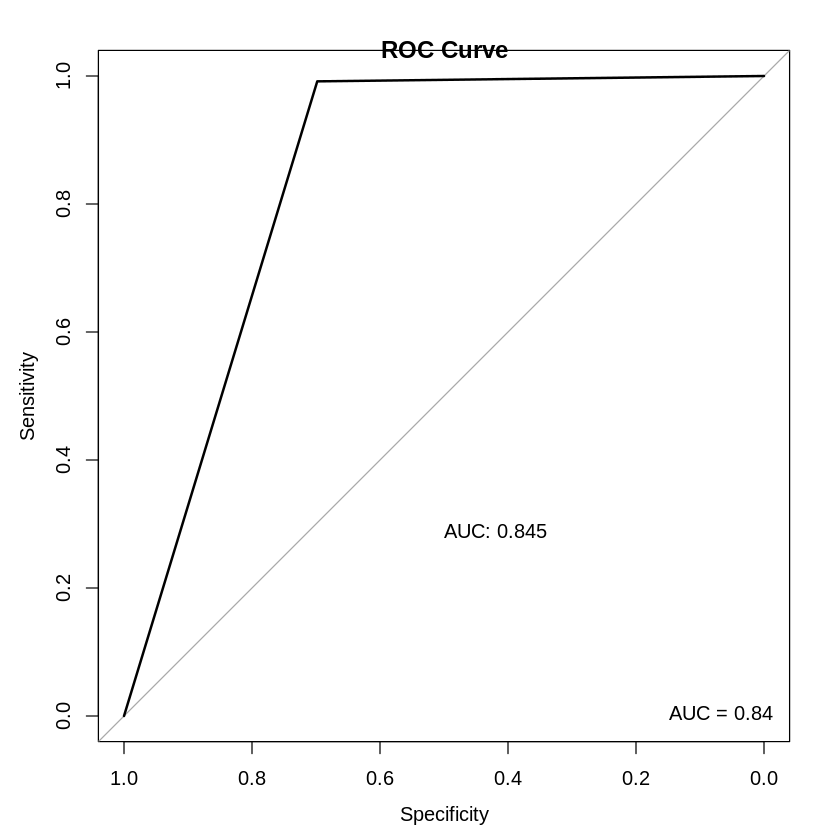

In [95]:
plot_ruc(predicted_labels)